# Convolução 1D

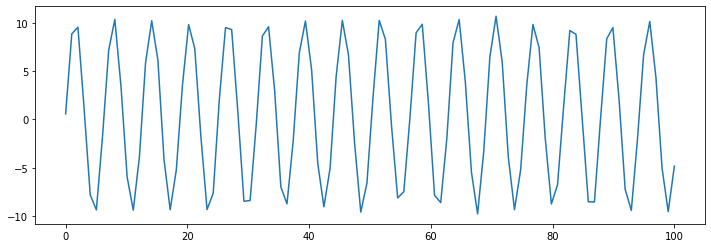

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve


# criar um espaço de dado simulado
x = np.linspace(0, 100, 100)
y = 10* np.sin(x) + np.random.rand(x.shape[0])
plt.figure(figsize=(12, 4))
plt.plot(x, y)






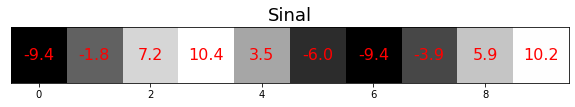

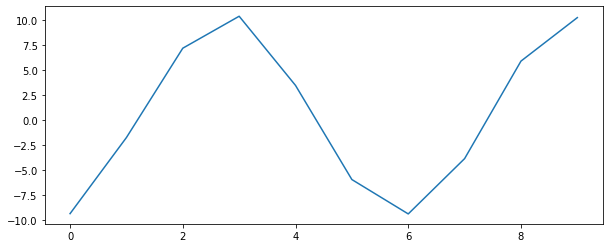

In [4]:
# função para plotar sinal como imagem
def show(valores, title,):
  plt.figure(figsize=(len(valores), 2))
  plt.imshow(valores[np.newaxis, :], cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
  plt.title(title, fontsize=18)
  plt.yticks([])


sinal = y[5:15]
show(sinal, 'Sinal')
plt.figure(figsize=(10, 4))
plt.plot(sinal)


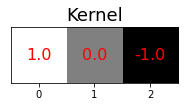

In [5]:
kernel = np.asarray([1, 0, -1])
show(kernel, 'Kernel')

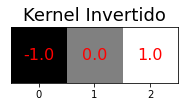

In [6]:
kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

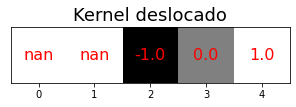

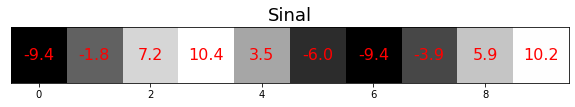

In [7]:
u = 2
deslocamento = [float('nan')]*u
kernel_deslocado = np.hstack((deslocamento, kernel_invertido))

show(kernel_deslocado, 'Kernel deslocado')
show(sinal, 'Sinal')


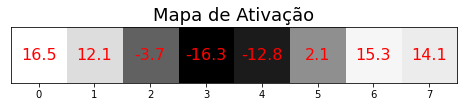

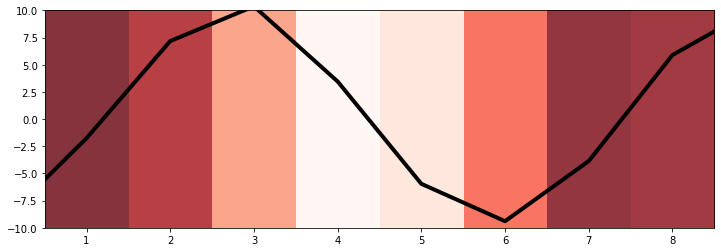

In [8]:
ativacao = convolve(sinal, kernel, mode='valid')
show(ativacao, 'Mapa de Ativação')

plt.figure(figsize=(12, 4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(ativacao[np.newaxis, :], cmap='Reds', aspect='auto', 
           alpha=0.8, extent=(0.5, 8.5, -10, 10))



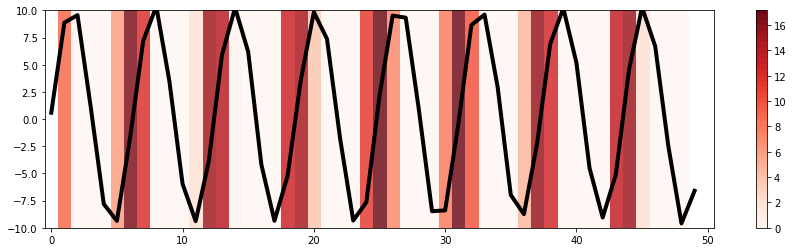

In [9]:
out = convolve(y[:50], kernel, mode='valid')
out[out < 0] = 0

plt.figure(figsize=(15, 4))
plt.plot(y[:50], color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()

# Convolução 2D


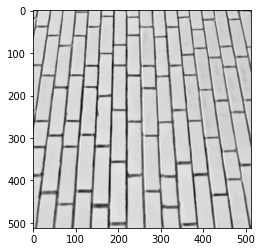

In [10]:
from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np


img = data.brick()
plt.imshow(img, cmap='Greys')


In [11]:
def show(valores, title):
  plt.figure(figsize=(len(valores), len(valores) ))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

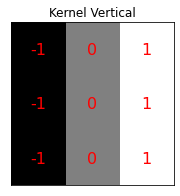

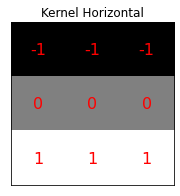

In [12]:
kernel_v = [ 
            [-1, 0, 1], 
            [-1, 0, 1], 
            [-1, 0, 1]
           ]
kernel_h = [
            [-1, -1, -1], 
            [0, 0, 0], 
            [1, 1, 1] 
           ]
  
show(kernel_v, "Kernel Vertical")
show(kernel_h, "Kernel Horizontal")



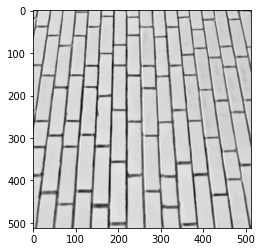

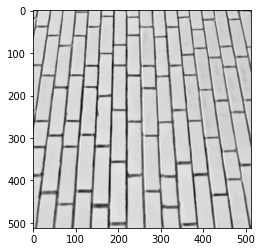

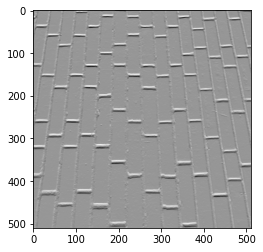

In [14]:
mapa_de_caracteristicas_v = convolve(img, kernel_v, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(mapa_de_caracteristicas_v, cmap='Greys')

mapa_de_caracteristicas_h = convolve(img, kernel_h, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(mapa_de_caracteristicas_h, cmap='Greys')



--2022-06-15 14:48:05--  https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png
Resolving is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)... 23.62.160.24, 2600:1408:c400:b92::2a1, 2600:1408:c400:b81::2a1, ...
Connecting to is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)|23.62.160.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30477 (30K) [image/png]
Saving to: ‘1200x630wa.png.4’

1200x630wa.png.4    100%[===================>]  29.76K  --.-KB/s    in 0.02s   

2022-06-15 14:48:05 (1.40 MB/s) - ‘1200x630wa.png.4’ saved [30477/30477]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Mapa de ativação Vertical')

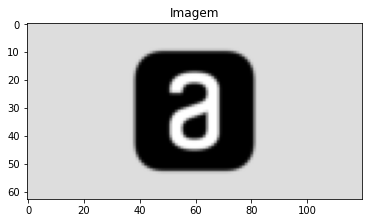

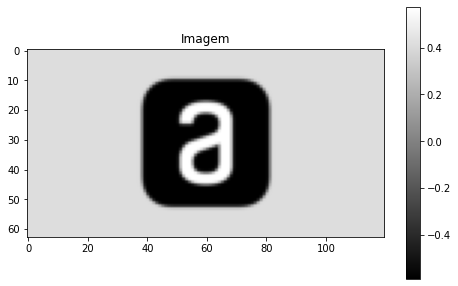

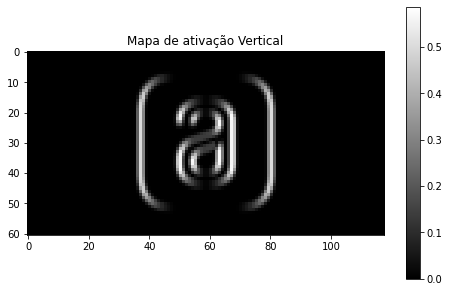

In [20]:
!wget https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png

img = io.imread('1200x630wa.png')
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

# ativação vertical
saida_v = convolve(img, kernel_v, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')
plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida_v), cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação Vertical')



--2022-06-15 14:46:22--  https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png
Resolving is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)... 23.36.69.251, 2600:1408:c400:b80::2a1, 2600:1408:c400:b93::2a1, ...
Connecting to is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)|23.36.69.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30477 (30K) [image/png]
Saving to: ‘1200x630wa.png.3’

1200x630wa.png.3    100%[===================>]  29.76K  --.-KB/s    in 0.01s   

2022-06-15 14:46:22 (3.03 MB/s) - ‘1200x630wa.png.3’ saved [30477/30477]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Mapa de ativação Horizontal')

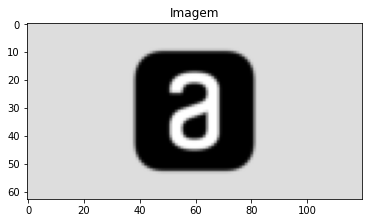

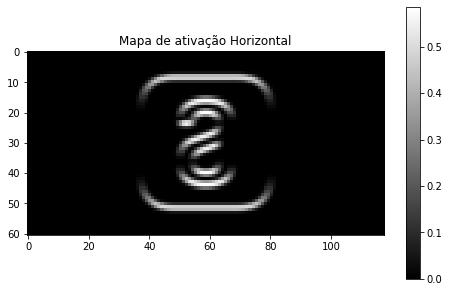

In [19]:
!wget https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png

img = io.imread('1200x630wa.png')
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

# ativação horizontal
saida_h = convolve(img, kernel_h, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')
plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida_h), cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação Horizontal')

--2022-06-15 14:48:57--  https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png
Resolving is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)... 23.62.160.24, 2600:1408:c400:b8e::2a1, 2600:1408:c400:b80::2a1, ...
Connecting to is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)|23.62.160.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30477 (30K) [image/png]
Saving to: ‘1200x630wa.png.5’

1200x630wa.png.5    100%[===================>]  29.76K  --.-KB/s    in 0.02s   

2022-06-15 14:48:57 (1.65 MB/s) - ‘1200x630wa.png.5’ saved [30477/30477]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Mapa de ativação Vertical')

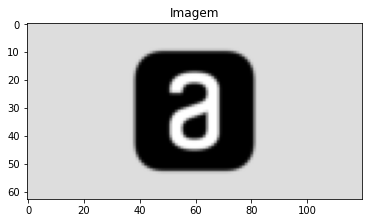

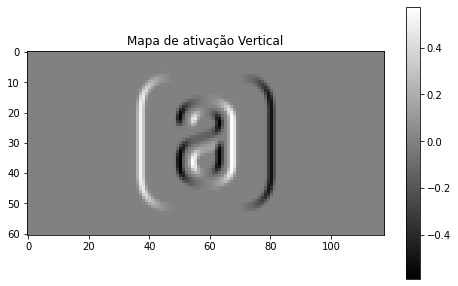

In [21]:
!wget https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png

img = io.imread('1200x630wa.png')
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

# ativação vertical
saida_v = convolve(img, kernel_v, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')
plt.figure(figsize=(8, 5))
plt.imshow(saida_v, cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação Vertical')

# Filtros Convolucionais

In [22]:
import torch
from torch import nn #neural networks

from skimage import data

import matplotlib.pyplot as plt


def show(img, kernel, resultado, titulo):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    plot = [img, kernel, resultado]
    titulos = ['Imagem', titulo, 'Mapa de Ativação']
    for k, ax, in enumerate(axs):
      ax.imshow(plot[k], cmap='gray')
      ax.set_yticks([])
      ax.set_xticks([])
      ax.set_title(titulos[k])
    
    for i, line in enumerate(kernel):
      for j, col in enumerate(line):
        axs[1].text(j, 
                    i, 
                    '{:.2f}'.format(col), 
                    fontsize=12, 
                    color='red',
                    ha='center',
                    va='center')


--2022-06-15 15:56:03--  https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 52.217.45.182
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|52.217.45.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82709 (81K) [image/jpeg]
Saving to: ‘GUI.jpg.1’

GUI.jpg.1           100%[===================>]  80.77K  --.-KB/s    in 0.04s   

2022-06-15 15:56:03 (2.11 MB/s) - ‘GUI.jpg.1’ saved [82709/82709]



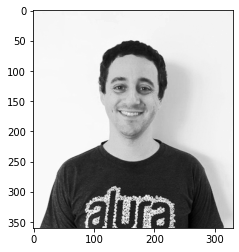

In [25]:
!wget https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg

img = io.imread('GUI.jpg')
img = img[:,:,0]

plt.imshow(img, cmap='gray')

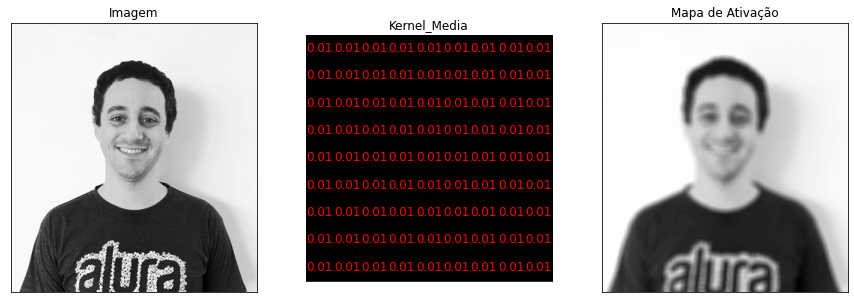

In [44]:
# MEDIA

kernel_size = 9
kernel_media = np.zeros((kernel_size, kernel_size))
kernel_media[:] = 1/(kernel_size**2)
#kernel_media = [[5, 7, -10], [1, 5, 2], [-10, 2, 5], ]

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel_Media')

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


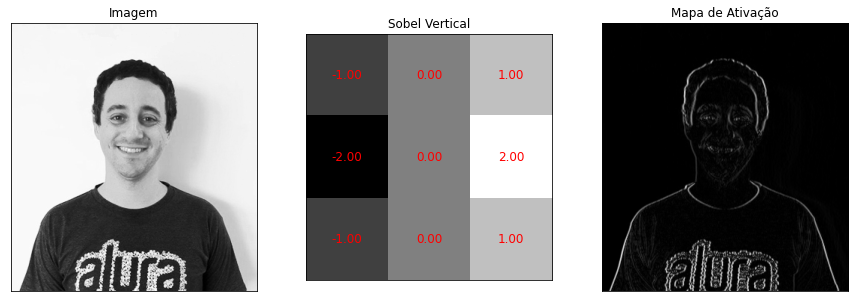

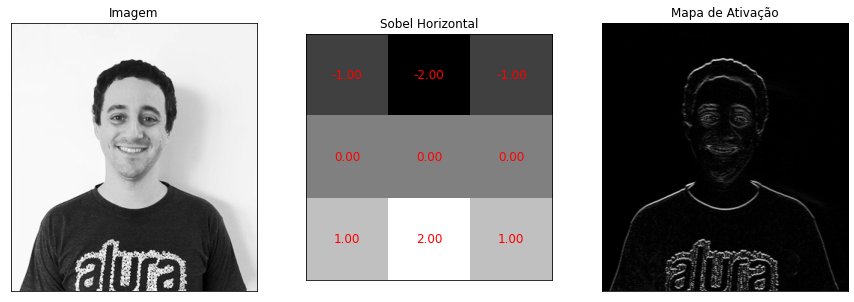

In [45]:
# reference: https://pt.wikipedia.org/wiki/Filtro_Sobel

##### SOBEL VERTICAL
sobel_v = np.zeros((3,3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0, 2]] = [-2, 2]
# print(sobel_v)

resultado = convolve(img, sobel_v, mode='valid')
show(img, sobel_v, np.abs(resultado), 'Sobel Vertical')


##### SOBEL HORIZONTAL
sobel_h = np.zeros((3,3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0, 2], 1] = [-2, 2]
print(sobel_h)

resultado = convolve(img, sobel_h, mode='valid')
show(img, sobel_h, np.abs(resultado), 'Sobel Horizontal')


[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


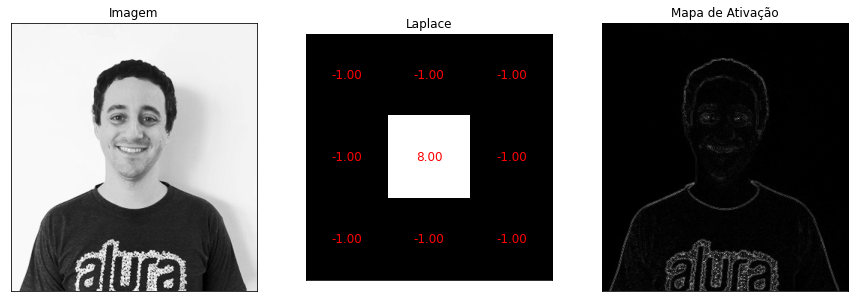

In [52]:
##### LAPLACE
#reference: https://en.wikipedia.org/wiki/Discrete_Laplace_operator | https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm

laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
print(laplace)

resultado = convolve(img, laplace, mode='valid')
show(img, laplace, np.abs(resultado), 'Laplace')

In [ ]:
# Padrões Complexos


In [3]:
!wget https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
!mv image_2007_000032.jpg?dl=0 plane.jpg


--2022-06-15 21:53:03--  https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0nrix9eknyybuqk/image_2007_000032.jpg [following]
--2022-06-15 21:53:03--  https://www.dropbox.com/s/raw/0nrix9eknyybuqk/image_2007_000032.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd94473ee777032b258b17667d5.dl.dropboxusercontent.com/cd/0/inline/BnQgzYsWNWtg_0zPIJEbTjns9H2eidYhJ6pbSyMfOX2b_klEJP5U2E1uB6xTVU-WcUnXFNrZ-hm9fjEiJuR_b9q05q560T6T2vsn5DF5MXePEftbyjfzKp1QHH20_OyZcagPQCFm9pyMisyDN39fmwL7LLcEO-352q54NpVCnk2wGw/file# [following]
--2022-06-15 21:53:03--  https://ucd94473ee777032b258b17667d5.dl.dropboxusercontent.com/cd/0/inline/BnQgzYsWNWtg_0zPIJEbTjns9H2eidYhJ6pb

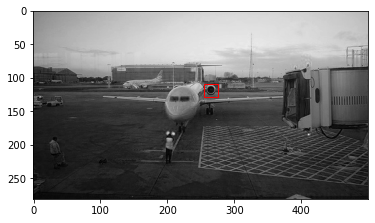

In [19]:
import matplotlib.patches as patches
from scipy.signal import convolve
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Imprime imagem e seleciona retangulo
img = io.imread('plane.jpg')
img = img[:,:,0]
retangulo = [109, 129, 255, 275]


# # Imprime imagem e retangulo
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

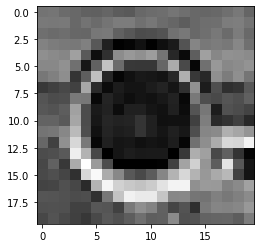

In [20]:
patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]
patch = patch - patch.mean()
patch = np.flip(patch)
#plt.imshow(patch)
plt.imshow(patch, cmap='gray')



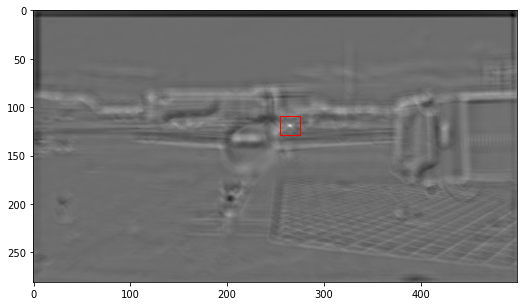

In [23]:
resultado = convolve(img, patch, mode='same')

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

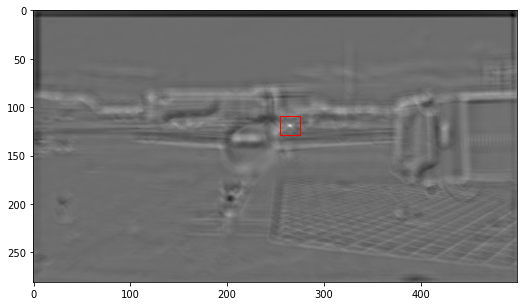

In [24]:
resultado = convolve(img, patch, mode='same')

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

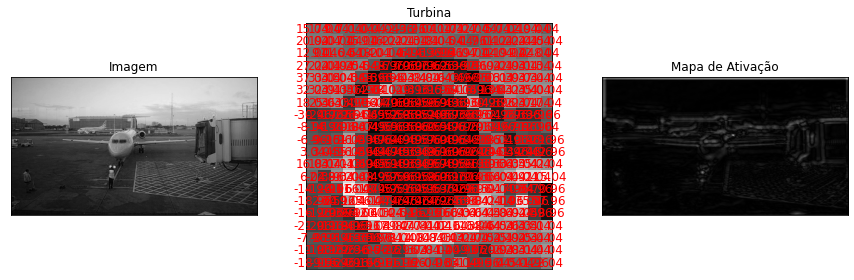

In [26]:
resultado = convolve(img, patch, mode='same')
show(img, patch, np.abs(resultado), 'Turbina')